# Assigment Python 3

Nama    : Farah Alysa Putri <br>
Program : Introduction to Python for Data Science <br>
Batch   : 02/001 <br>
Dataset : Bank Marketing

## Import Libraries

In [1]:
# import library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Data Loading

Pada Assignment 3, dataset yang digunakan adalah dataset Bank Marketing yang terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau ('tidak') berlangganan.

In [2]:
# data loading
data = pd.read_csv('bank-full.csv', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Variabel-variabel pada dataset: <br>
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')<br>
6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')<br>
7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')<br>
8 - contact: contact communication type (categorical: 'cellular', 'telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - duration: last contact duration, in seconds (numeric). <br>
11 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
12 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
13 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
14 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')<br>
15 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

## Explore Data

In [3]:
# jumlah klien berdasarkan pekerjaan
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [4]:
# jumlah klien berdasarkan pendidikan
data.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

C:\Users\Farah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


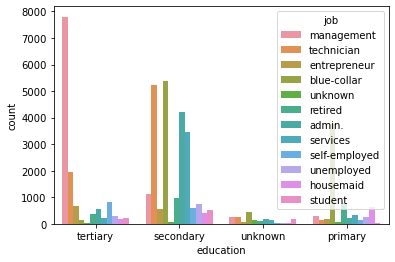

In [5]:
sns.countplot("education", hue="job", data=data)
plt.show()

Berdasarkan grafik, dapat dilihat bahwa: <br>
1. Klien dengan pendidikan tertiary sebagian besar bekerja sebagai management. 
2. Klien dengan pendidikan secondary paling banyak bekerja sebagai blue-collar, kemudian disusul oleh technician dan admin. 
3. Klien dengan pendidikan primary sebagian besar bekerja sebagai blue-collar.

## Preprocessing

In [6]:
# mengganti no (0) dan yes (1) pada kolom y
data['y'].replace({'no': 0, 'yes': 1},inplace = True)

In [7]:
# categorical variables 
categoric_c = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
datafinal = pd.get_dummies(data, columns=categoric_c)
print(datafinal.shape)
datafinal.head()

(45211, 52)


,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [8]:
# preprocessing MinMaxScaler
standa = preprocessing.MinMaxScaler()
standa.fit(datafinal)
datafinal = pd.DataFrame(standa.transform(datafinal), index=datafinal.index, columns=datafinal.columns)
datafinal.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# correlation matrix
corr = datafinal.corr()
corr1 = pd.DataFrame(abs(corr['y']),columns = ['y'])
nonvals = corr1.loc[corr1['y'] < 0.005]
print('Var correlation < 0.5%',nonvals)
nonvals = list(nonvals.index.values)

# extract variables dengan correlation < 0.5%
datafinal1 = datafinal.drop(columns=nonvals,axis=1)
print('Data Final',datafinal1.shape)

Var correlation < 0.5%                           y
job_self-employed  0.000855
job_unknown        0.000267
marital_divorced   0.002772
Data Final (45211, 49)


## Split Data

In [10]:
# split data train dan test
Y = datafinal1['y']
X = datafinal1.drop(columns=['y'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [11]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (36168, 48)
Y train shape:  (36168,)
X test shape:  (9043, 48)
Y test shape:  (9043,)


## Logistic Regression

In [12]:
# logistic regression
# mendefinisikan model
logreg = LogisticRegression(C=10)

# training model
logreg.fit(X_train, Y_train)

# predict target values
Y_predict1 = logreg.predict(X_test)

C:\Users\Farah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


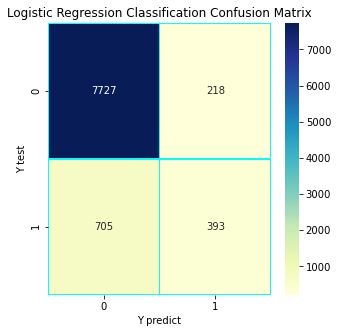

In [13]:
# confusion matrix
logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [14]:
# test score
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

0.8979321021784806


In [15]:
print("Accuracy Score:", accuracy_score(Y_test, Y_predict1))
print(classification_report(Y_test, Y_predict1))

Accuracy Score: 0.8979321021784806
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      7945
         1.0       0.64      0.36      0.46      1098

    accuracy                           0.90      9043
   macro avg       0.78      0.67      0.70      9043
weighted avg       0.88      0.90      0.88      9043



## K-Nearest Neighbors

In [16]:
# K-Nearest Neighbors 
# mendefinisikan model
knncla = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)

# training model
knncla.fit(X_train, Y_train)

# predict target values
Y_predict2 = knncla.predict(X_test)

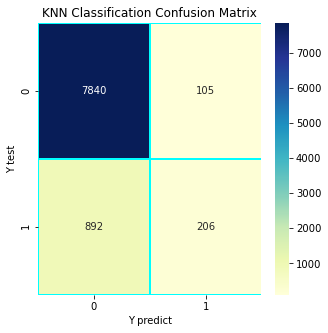

In [17]:
# confusion matrix
knncla_cm = confusion_matrix(Y_test, Y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [18]:
# test score
score_knncla= knncla.score(X_test, Y_test)
print(score_knncla)

0.8897489771093664


In [19]:
print("Accuracy Score:", accuracy_score(Y_test, Y_predict2))
print(classification_report(Y_test, Y_predict2))

Accuracy Score: 0.8897489771093664
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      7945
         1.0       0.66      0.19      0.29      1098

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.62      9043
weighted avg       0.87      0.89      0.86      9043



## Support Vector Machine

In [20]:
# mendefinisikan SVM model
svm = SVC()

In [21]:
# training model
svm.fit(X_train, Y_train)

SVC()

In [22]:
# predict target values
Y_predict3 = svm.predict(X_test)

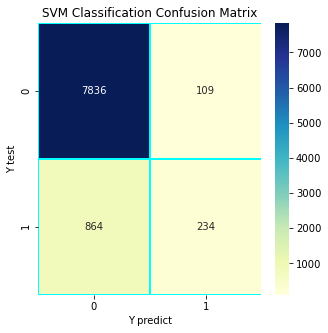

In [23]:
# confusion matrix
svmcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [24]:
# test score
score_svmcla = svm.score(X_test, Y_test)
print(score_svmcla)

0.8924029636182683


In [25]:
print("Accuracy Score:", accuracy_score(Y_test, Y_predict3))
print(classification_report(Y_test, Y_predict3))

Accuracy Score: 0.8924029636182683
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      7945
         1.0       0.68      0.21      0.32      1098

    accuracy                           0.89      9043
   macro avg       0.79      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



## Decision Tree

In [26]:
# decision tree
# mendefinisikan model
dtcla = DecisionTreeClassifier(random_state=9)

# training model
dtcla.fit(X_train, Y_train)

# predict target values
Y_predict4 = dtcla.predict(X_test)

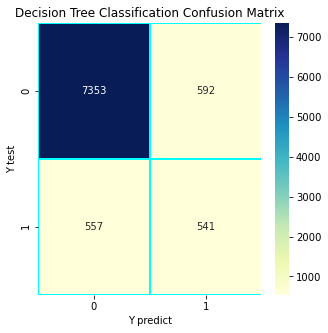

In [27]:
# confusion matrix
dtcla_cm = confusion_matrix(Y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [28]:
# test score
score_dtcla = dtcla.score(X_test, Y_test)
print(score_dtcla)

0.8729403958863209


In [29]:
print("Accuracy Score:", accuracy_score(Y_test, Y_predict4))
print(classification_report(Y_test, Y_predict4))

Accuracy Score: 0.8729403958863209
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      7945
         1.0       0.48      0.49      0.48      1098

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.71      9043
weighted avg       0.87      0.87      0.87      9043



## Random Forest

In [30]:
# random forest
# mendefinisikan model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# training model
rfcla.fit(X_train, Y_train)

# predict target values
Y_predict5 = rfcla.predict(X_test)

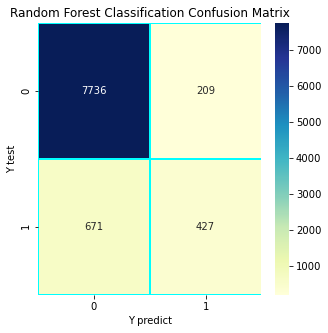

In [31]:
# confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [32]:
# test score
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

0.9026871613402632


In [33]:
print("Accuracy Score:", accuracy_score(Y_test, Y_predict5))
print(classification_report(Y_test, Y_predict5))

Accuracy Score: 0.9026871613402632
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      7945
         1.0       0.67      0.39      0.49      1098

    accuracy                           0.90      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



## Naive Bayes

In [34]:
# naive bayes
# mendefinisikan model
nbcla = GaussianNB()

# training model
nbcla.fit(X_train, Y_train)

# predict target values
Y_predict6 = nbcla.predict(X_test)

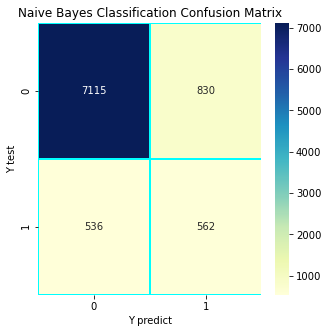

In [35]:
# confusion matrix
nbcla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [36]:
# test score
score_nbcla = nbcla.score(X_test, Y_test)
print(score_nbcla)

0.8489439345349995


In [37]:
print("Accuracy Score:", accuracy_score(Y_test, Y_predict6))
print(classification_report(Y_test, Y_predict6))

Accuracy Score: 0.8489439345349995
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91      7945
         1.0       0.40      0.51      0.45      1098

    accuracy                           0.85      9043
   macro avg       0.67      0.70      0.68      9043
weighted avg       0.87      0.85      0.86      9043



## Compare the Model

In [38]:
# membandingkan model
Accuracy_score = pd.Series([score_logreg, score_svmcla, score_nbcla, score_dtcla, 
                         score_rfcla, score_knncla], index=['Logistic Regression Score', 
                        'Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score', 
                         'Random Forest Score', 'K-Nearest Neighbour Score']) 
print(Accuracy_score)

Logistic Regression Score       0.897932
Support Vector Machine Score    0.892403
Naive Bayes Score               0.848944
Decision Tree Score             0.872940
Random Forest Score             0.902687
K-Nearest Neighbour Score       0.889749
dtype: float64


Berdasarkan perbandingan nilai akurasi dari 6 algoritma model machine learning, model dengan nilai akurasi tertinggi adalah model Random Forest dengan nilai akurasi sebesar 0.902687. Sehingga algoritma yang paling sesuai untuk digunakan adalah Random Forest.